In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re,string
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer


drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
data = pd.read_excel('/content/gdrive/MyDrive/colab share folder/kanye/KanyeData.xlsx')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      129 non-null    int64 
 1   Song    129 non-null    object
 2   Album   129 non-null    object
 3   Year    129 non-null    int64 
 4   Lyrics  129 non-null    object
dtypes: int64(2), object(3)
memory usage: 5.2+ KB


In [ ]:
null_values = data.isnull().sum()
print('There are {} missing values for {}.'.format(null_values[4],null_values.index[4]))

There are 0 missing values for Lyrics.


In [ ]:
num_duplicates = data.duplicated().sum() #identify duplicates
print('There are {} duplicate lyrics present in the dataset'.format(num_duplicates))

There are 0 duplicate lyrics present in the dataset


#Cleaning our data:

In [ ]:
stop = stopwords.words('english')
wl = WordNetLemmatizer()

In [ ]:
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot",
           "'cause": "because", "could've": "could have", "couldn't": "could not",
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not",
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will",
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will",
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will",
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not",
           "might've": "might have","mightn't": "might not","mightn't've": "might not have",
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have",
           "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would",
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
           "she's": "she is", "should've": "should have", "shouldn't": "should not",
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is",
           "there'd": "there would", "there'd've": "there would have", "there's": "there is",
           "here's": "here is","they'd": "they would", "they'd've": "they would have",
           "they'll": "they will", "they'll've": "they will have", "they're": "they are",
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
           "we're": "we are", "we've": "we have", "weren't": "were not",
           "what'll": "what will", "what'll've": "what will have","what're": "what are",
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have",
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will",
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is",
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
           "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would",
           "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
           "you're": "you are", "you've": "you have",'okay':'ok' }

In [ ]:
#function to clean data
def clean_text(text,lemmatize = True):
    soup = BeautifulSoup(text, "html.parser") #remove html tags
    text = soup.get_text()
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")]) #Using the expanded map for a better cleaning result
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    text = re.sub(r'\.(?=\S)', '. ',text) #add space after full stop
    text = re.sub(r'http\S+', '', text) #remove urls
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #remove punctuation
    if lemmatize:
        text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()]) #lemmatize
    else:
        text = " ".join([word for word in text.split() if word not in stop and word.isalpha()])
    return text

In [ ]:
data_copy = data.copy()

In [ ]:
data['Lyrics']=data['Lyrics'].apply(clean_text,lemmatize = True)

We do not aim to perform a topic analysis that integrates the aspect of the song's textual structure (e.g. the implication of the presence of a word in the verse/chorus of the song), but a purely "verbal" topic analysis.
Therefore, we decided to remove any mention of the song's structure from its lyrics.

In [ ]:
song_struc=['chorus','verse','intro','outro','bridge'] # Remove song structure words from each of the lyrics
for i in data.index:
    for word in data['Lyrics'][i].split():
        if word in song_struc:
            data['Lyrics'][i]=data['Lyrics'][i].replace(word,"")

<ipython-input-136-3eb3cc5c6384>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Lyrics'][i]=data['Lyrics'][i].replace(word,"")


In [ ]:
rap_sounds=['oh','ohoh','oo','wah','woo','uh','bam','yeah','ooh','oohooh','oooh','ey','yo','woo','wah','la','ay','lah','ayy','hey','ya','ty','ign','em']
for i in data.index:
    for word in data['Lyrics'][i].split():
        if word in rap_sounds:
            data['Lyrics'][i]=data['Lyrics'][i].replace(word,"")

<ipython-input-137-7519d2a463ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Lyrics'][i]=data['Lyrics'][i].replace(word,"")


#Data Exploration

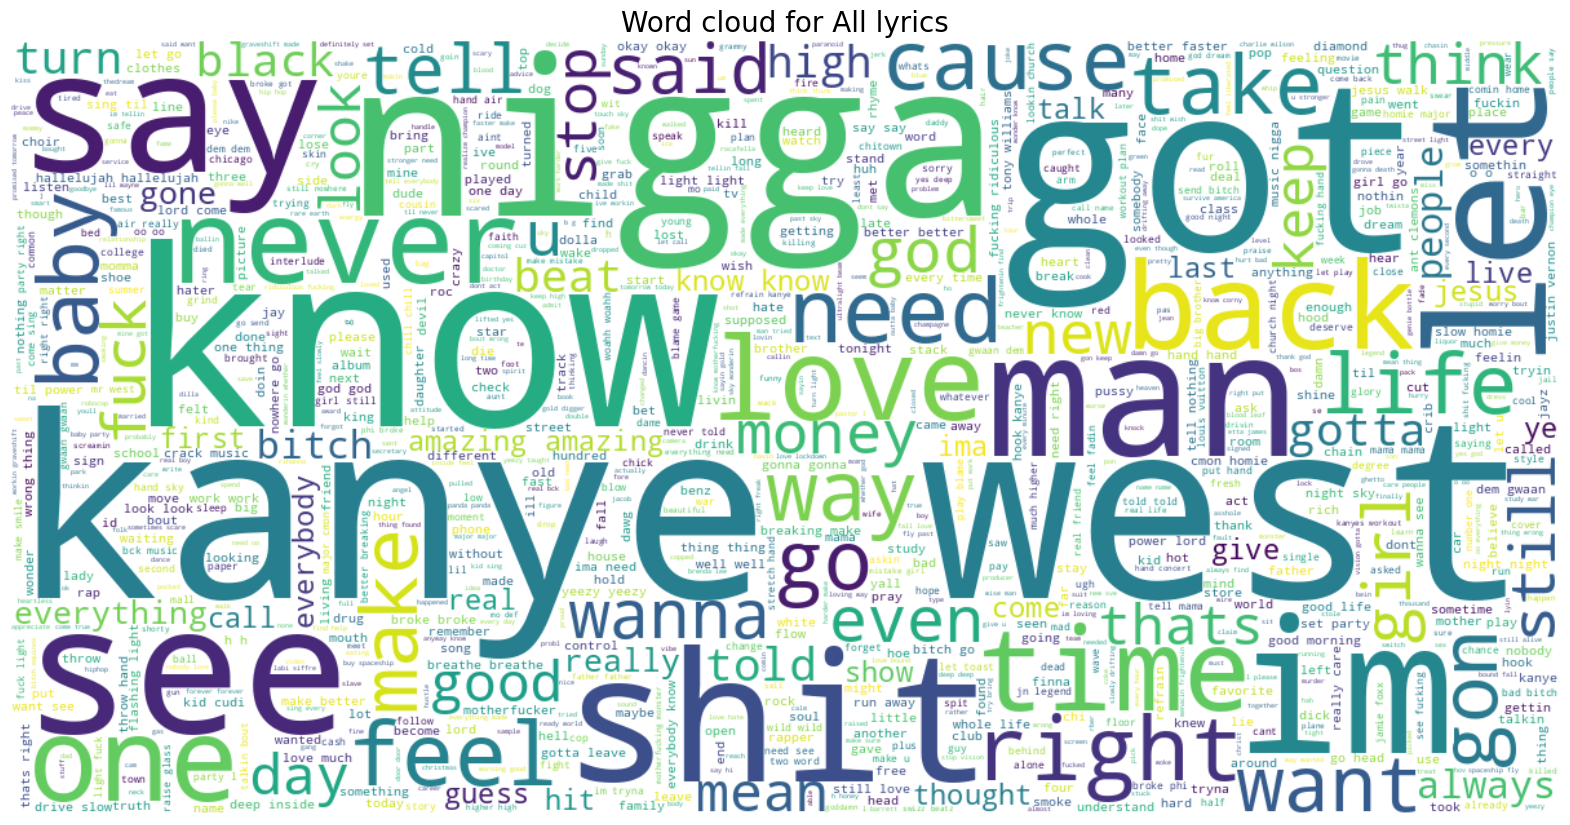

In [ ]:

#wordcloud
lyrics = data['Lyrics']
lyrics_string = ' '.join(lyrics)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(lyrics_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for All lyrics',fontsize = 20)
plt.show()

In [ ]:
def lyrics_by_year(year):
  lyrics_y=data[data.Year==year]['Lyrics']
  return lyrics_y

In [ ]:
#Create dictionary: key = year (album), value= series of lyrics per song
years=[2002,2004,2006,2007,2008,2010,2013,2016,2018,2019]
d_album_as_series = {}
for y in years:
    d_album_as_series["{0}".format(y)] = lyrics_by_year(y)

In [ ]:
#Create dictionary: key=year (album), value= lyrics of all album as list of strings
d_album_as_str={}
d_album_as_lstr={}
for k,v in d_album_as_series.items():
    v_str=' '.join(d_album_as_series[k])
    v_str=" ".join(v_str.split())
    v_w_ls=v_str.split(" ")
    v_w_ls = [ele for ele in v_w_ls if ele.strip()]
    d_album_as_str[k]=v_str
    d_album_as_lstr[k]=v_w_ls

In [ ]:
#Most common words per year (album)
frq10_per_album={}
for key,value in d_album_as_lstr.items():
    counter = Counter(value)
    top_10=counter.most_common(10)
    l=[]
    for tup in top_10:
        l.append(tup[0])
    frq10_per_album[key]=l

frq10_df=pd.DataFrame(frq10_per_album)

In [ ]:
pd.DataFrame(frq10_per_album)

,2002,2004,2006,2007,2008,2010,2013,2016,2018,2019
0,jesus,get,get,like,know,know,nigga,kanye,know,hallelujah
1,two,like,got,know,amazing,kanye,bitch,know,love,sing
2,walk,know,west,cannot,love,west,know,feel,get,work
3,right,man,kanye,get,never,like,go,like,nigga,hand
4,go,gonna,like,good,keep,see,dem,west,make,lord
5,word,thing,make,never,like,let,like,get,still,every
6,like,got,broke,west,stop,im,gwaan,nigga,see,need
7,still,well,better,kanye,thing,light,god,god,like,god
8,god,kanye,know,got,kanye,get,cannot,need,day,jesus
9,way,nigga,ever,light,see,nigga,kanye,love,kanye,come


In [ ]:
#Create dictionary: key= year (album), value=Number of characters per year
length_ch_dict = {key: len(value.replace(" ","")) for key, value in d_album_as_str.items()}

In [ ]:
def barplot_values(ax):
    for i in ax.patches:
        x = i.get_x()+0.07 #adjust the numbers (higher numbers = to the right, lower = to the left)
        height = i.get_height()+0.1 #adjust the numbers (higher numbers = up, lower = down)
        value = round(float("{0:.2f}".format(i.get_height())),2)

        ax.text(x, height, value, fontsize=10,color='black')

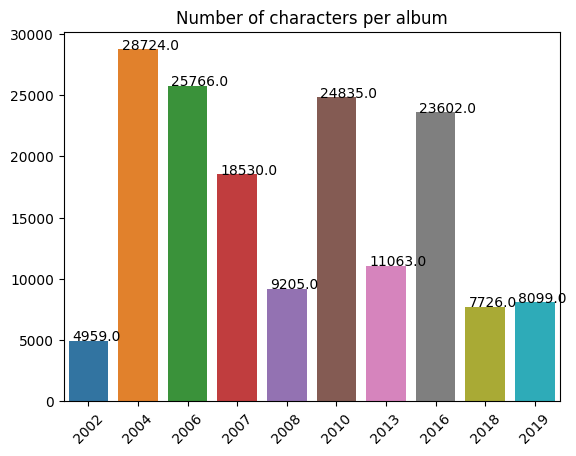

In [ ]:
ax=sns.barplot(x=list(length_ch_dict.keys()),y=list(length_ch_dict.values()))
plt.title("Number of characters per album")
plt.tick_params(axis='x', rotation=45)
barplot_values(ax)

In [ ]:
#Create dictionary: key= year (album), value=Number of words per year
length_w_dict = {key: len(value) for key, value in d_album_as_lstr.items()}

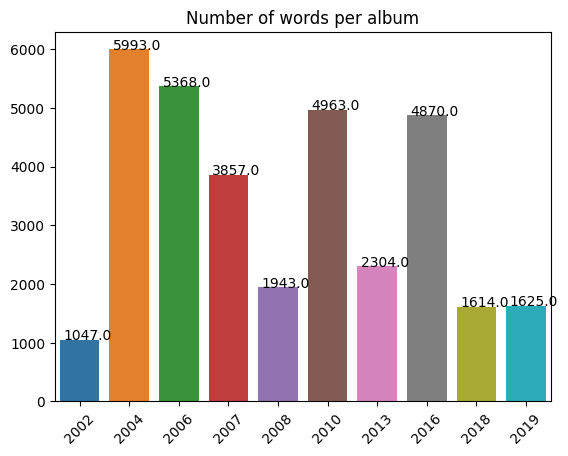

In [ ]:
ax=sns.barplot(x=list(length_w_dict.keys()),y=list(length_w_dict.values()))
plt.title("Number of words per album")
plt.tick_params(axis='x', rotation=45)
barplot_values(ax)

In [ ]:
#Create dictionary: key=year (album), value=average word length per year
d_avg_w={}
for k,v in length_ch_dict.items():
  d_avg_w[k]=length_ch_dict[k]/length_w_dict[k]

In [ ]:
data['lyrics_ls']=1
for i in data.index:
    data['lyrics_ls'][i]=data['Lyrics'][i].split()

data['avg_wlen']=1
for i in data.index:
    temp = [len(ele) for ele in data['lyrics_ls'][i]]
    data['avg_wlen'][i]=0 if len(temp) == 0 else (float(sum(temp)) / len(temp))




<ipython-input-150-b2b75e24dc62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lyrics_ls'][i]=data['Lyrics'][i].split()
<ipython-input-150-b2b75e24dc62>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avg_wlen'][i]=0 if len(temp) == 0 else (float(sum(temp)) / len(temp))


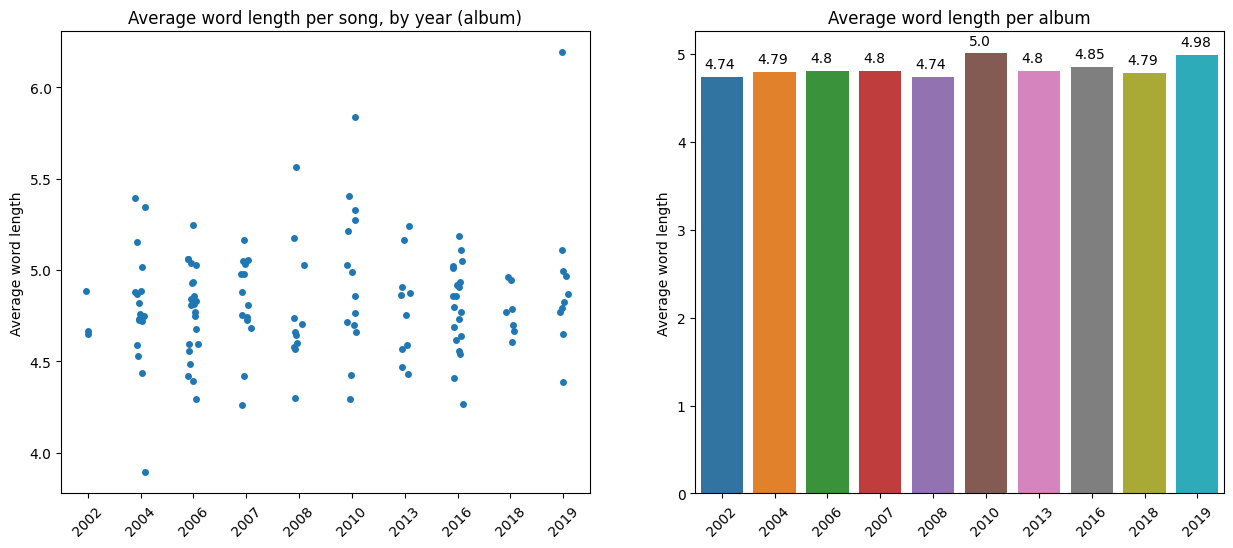

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
ax=sns.stripplot(data=data,x='Year',y='avg_wlen')
plt.title("Average word length per song, by year (album)")
plt.tick_params(axis='x', rotation=45)
plt.xlabel(None)
plt.ylabel("Average word length")

plt.subplot(1,2,2)
ax=sns.barplot(x=list(d_avg_w.keys()),y=list(d_avg_w.values()))
plt.title("Average word length per album")
plt.tick_params(axis='x', rotation=45)
barplot_values(ax)
plt.ylabel("Average word length")

plt.show()

In [ ]:
#n-gram analysis

def get_ngrams(lyrics, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(lyrics)
    bag_of_words = vec.transform(lyrics) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency
    return words_freq[:n]


In [ ]:
def ngram_df(n):
    ngram_df=pd.DataFrame()
    for k,v in d_album_as_lstr.items():
        new_v=[]
        i=0
        while i < len(v)-1:
            if v[i]==v[i+1]:
                i+=1
            else:
                new_v.append(v[i])
                i+=1
        else:
            new_v.append(v[i])
        new_v=" ".join(new_v)
        ngrams = get_ngrams([new_v],10,n)
        ngram_ls=[]
        for tup in ngrams:
            tup_str = ':'.join([str(element) for element in tup])
            ngram_ls.append(tup_str)
        ngram_df[k]=ngram_ls
    return ngram_df

In [ ]:
ngram_df(2)


,2002,2004,2006,2007,2008,2010,2013,2016,2018,2019
0,jesus walk:15,kanye west:31,kanye west:60,kanye west:40,kanye west:25,kanye west:59,kanye west:26,kanye west:57,kanye west:15,til power:22
1,two word:11,set party:14,make better:23,cannot study:28,wrong thing:16,fucking ridiculous:20,dem gwaan:18,night sky:17,make mistake:10,sing til:19
2,still nowhere:10,party right:13,breaking make:22,good morning:18,never know:14,run away:15,gwaan dem:12,deep inside:16,mistake girl:10,power lord:16
3,nowhere go:10,workout plan:12,go head:18,good life:15,cannot stop:11,know see:14,send bitch:12,feel fadin:12,girl still:10,lord come:15
4,kanye west:6,raise glass:11,drive slow:18,cannot tell:14,heartless could:10,ima need:13,bitch go:12,real friend:11,still love:10,kanye west:15
5,throw hand:6,kanyes workout:10,girl go:17,better faster:13,keep love:9,really care:13,let go:10,lookin church:11,love way:6,come sing:12
6,go still:5,im tellin:9,gotta leave:16,make stronger:13,love lockdown:9,want see:12,go send:10,church night:11,shit could:6,everything need:10
7,mo def:5,tellin fall:9,leave get:16,tell nothing:13,worry bout:9,need see:12,justin vernon:8,god dream:9,could get:6,ant clemons:8
8,walk god:4,said want:9,get girl:16,feel like:11,real boy:9,see fucking:12,fall love:8,feel like:9,get menacin:6,need oo:8
9,god show:4,one thing:9,music nigga:14,never told:11,could heartless:8,fucking hand:12,new sve:7,yes deep:9,menacin frightenin:6,sing every:6


In [ ]:
ngram_df(3)

,2002,2004,2006,2007,2008,2010,2013,2016,2018,2019
0,still nowhere go:10,set party right:13,breaking make better:17,cannot tell nothing:13,heartless could heartless:8,ima need see:12,dem gwaan dem:12,lookin church night:11,make mistake girl:10,sing til power:19
1,nowhere go still:5,im tellin fall:9,gotta leave get:16,cannot study cannot:10,loving way wanted:8,need see fucking:12,gwaan dem gwaan:12,church night sky:11,mistake girl still:10,til power lord:16
2,go still nowhere:5,care people say:8,leave get girl:16,study cannot study:10,worry bout wrong:8,see fucking hand:12,send bitch go:12,yes deep inside:9,girl still love:10,power lord come:14
3,jesus walk god:4,ive workin graveshift:8,get girl go:16,good morning good:9,bout wrong thing:8,air really care:12,bitch go send:10,deep inside feel:7,shit could get:6,lord come sing:9
4,walk god show:4,workin graveshift made:8,girl go head:16,morning good morning:9,wrong thing wrong:8,get much higher:11,go send bitch:10,wanna feel liberated:6,could get menacin:6,come sing til:8
5,god show way:4,graveshift made shit:8,drive slow homie:13,make stronger need:9,thing wrong thing:8,fuck light fuck:11,let go let:6,bad bitch equinox:6,get menacin frightenin:6,everything need oo:8
6,show way devil:4,made shit wish:8,cmon homie major:13,work harder make:9,like tll never:8,light fuck light:11,go let go:6,know right freak:6,menacin frightenin find:6,need oo everything:6
7,way devil tryna:4,shit wish could:8,go head get:12,harder make better:9,tll never know:8,play blame game:11,fall love bound:6,party please baby:6,frightenin find help:6,oo everything need:6
8,devil tryna break:4,wish could buy:8,head get gotta:12,make better faster:9,stop vision gotta:7,much higher high:10,bound fall love:6,please baby party:6,get genie bottle:6,need sing til:5
9,tryna break jesus:4,could buy spaceship:8,get gotta leave:12,better faster make:9,vision gotta get:7,shit fucking ridiculous:10,know new sve:5,deep inside get:6,nothing hurt anymore:5,come sing every:4
